# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
name = "Kuma"


config_path = 'configs/simple_RE_config_shared_kum.yml'

loaded_info = parse_config_for_analysis(config_path)



C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json
200


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_shared_kum_rationalized.pt


GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cuda")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

## Perplexity and Accuracy

In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE

lm_RE.hard = True
lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1,)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:01<00:00, 150.45it/s]

{'mean_acc': {'mean': 0.3727967987626972, 'std': 0.0}, 'mean_perplexity': {'mean': 28.048089457824158, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.4970964045144005, 'std': 0.0}}
{'mean_acc': 0.38537945775372195, 'mean_perplexity': 25.526450388929813, 'mean_mask_percentage': 0}


## Change in perplexity TODO

In [5]:
# ### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)
# change_in_perplexity

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis, prepare_rel_pos_count, add_distribution_to_file

#Make sure we use the hard (binarized) values


rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

rel_pos_count = prepare_rel_pos_count(rational_distributions["rel_pos_count"])
add_distribution_to_file(rel_pos_count, name, file="pos_counts.txt")

{'abs_average': 0.0, 'rel_average': 0.0, 'abs_pos_count': Counter({3.0: 5876, 2.0: 5876, 1.0: 5876, 4.0: 5870, 5.0: 5867, 6.0: 5858, 7.0: 5828, 8.0: 5781, 9.0: 5731, 10.0: 5663, 11.0: 5564, 12.0: 5435, 13.0: 5282, 14.0: 5029, 15.0: 4725, 16.0: 4338, 17.0: 3900, 18.0: 3448, 19.0: 2963, 20.0: 2526, 21.0: 2072, 22.0: 1673, 23.0: 1330, 24.0: 1076, 25.0: 847, 26.0: 653, 27.0: 525, 28.0: 420, 29.0: 370, 30.0: 315, 31.0: 264, 32.0: 235, 33.0: 204, 34.0: 197, 35.0: 183, 41.0: 176, 36.0: 174, 46.0: 170, 43.0: 169, 45.0: 168, 37.0: 167, 44.0: 167, 40.0: 164, 42.0: 162, 47.0: 162, 38.0: 160, 39.0: 159, 49.0: 150, 50.0: 149, 52.0: 148, 51.0: 146, 55.0: 146, 54.0: 143, 58.0: 139, 48.0: 138, 56.0: 136, 53.0: 133, 60.0: 132, 68.0: 131, 86.0: 131, 57.0: 130, 59.0: 130, 65.0: 125, 67.0: 125, 70.0: 125, 87.0: 125, 69.0: 124, 83.0: 122, 82.0: 121, 85.0: 120, 74.0: 118, 75.0: 118, 62.0: 117, 63.0: 117, 66.0: 117, 77.0: 116, 64.0: 115, 71.0: 115, 78.0: 114, 73.0: 113, 84.0: 113, 81.0: 111, 72.0: 110, 61.0:

,percentages,Random 50,Policy token,Gumbel,Kuma
0,0,0.043379,0.042394,0.308248,0.133743
1,10,0.099357,0.100498,0.212583,0.288562
2,20,0.101965,0.104503,0.080472,0.178922
3,30,0.097884,0.098656,0.034567,0.094549
4,40,0.101635,0.102879,0.021705,0.064816
5,50,0.098858,0.101125,0.015971,0.043323
6,60,0.100687,0.101597,0.012440,0.033283
7,70,0.097394,0.097965,0.012699,0.023348
8,80,0.101640,0.101892,0.019308,0.021798
9,90,0.099564,0.098183,0.045711,0.027541


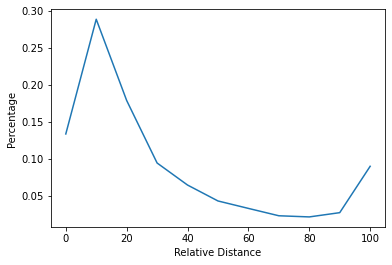

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

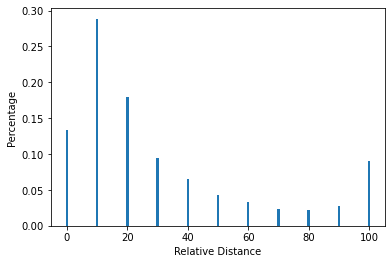

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

## Analysing some examples

In [9]:
examples = ["How are you doing? [SEP]", "What did you do today? [SEP]", "How's work? [SEP]", "Would you like some coffee? [SEP]"]

In [10]:
## First with greedy rationals
completed_dialogue = lm_RE.complete_dialogues(examples, total_length=200, greedy_rationals=False)


In [11]:
from utils.analysis import pretty_print_completed_dialogues
pretty_print_completed_dialogues(completed_dialogue)

context ----> response
how are you doing ? [SEP] ------> i ' m going to have to help at least some food . [SEP]
[MASK] [MASK] [MASK] [MASK] ? [SEP] i ' m going to have to help at least some food . [SEP] ------> that ' s right . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] help at least some food . [SEP] that ' s right . [SEP] ------> thank you very much . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] that ' s right . [SEP] thank you very much . [SEP] ------> i am glad that you are not going to have . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] i am glad that you are not going to have . [SEP] ------> how did you get your job ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK]

In [12]:
completed_dialogue

[{'completed_dialogue': "how are you doing ? [SEP] i ' m going to have to help at least some food . [SEP] that ' s right . [SEP] thank you very much . [SEP] i am glad that you are not going to have . [SEP] how did you get your job ? [SEP] i have to go to my family . [SEP] i ' m not sure . [SEP] what is your problem ? [SEP] i ' ve been working on a party . [SEP] thanks for my friend . [SEP] i know . [SEP] do you think it ' s going to be goodtown ? [SEP] oh , that ' s true . what ' s that you need ? [SEP] i don ' t have any problems . [SEP] i will get it . [SEP] it ’ s a good idea . [SEP] it ’ s not too bad . [SEP] what time is it ? [SEP] the train is for a bus stop , which is the problem . [SEP] you ' ll do anything . [SEP] that ' s right . [SEP] ok , i ’ ll be here . [SEP] thank you . [SEP]",
  'rationals': [tensor([]),
   tensor([False, False, False, False,  True,  True,  True,  True,  True,  True,
            True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
     